<a href="https://colab.research.google.com/github/conglapgit45/Logistic_Regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction

In [1]:
!gdown --id 1OFgBOb4B1j32uK26vf5urkp8rqVmD_Wf
!unzip /content/titanic.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OFgBOb4B1j32uK26vf5urkp8rqVmD_Wf
To: /content/titanic.zip
100% 7.00k/7.00k [00:00<00:00, 20.0MB/s]
Archive:  /content/titanic.zip
  inflating: titanic_modified_dataset.csv  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Read data
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path, index_col='PassengerId')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


In [4]:
# Split data to X and y
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1] , dataset_arr[:, -1]

In [5]:
# Add bias to X
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [6]:
# Split data to train, val and test
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b,
    y,
    test_size = val_size,
    random_state = random_state,
    shuffle = is_shuffle
)

X_train , X_test , y_train , y_test = train_test_split(
    X_train , y_train ,
    test_size = test_size ,
    random_state = random_state ,
    shuffle = is_shuffle
)

In [7]:
# Standardize data
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [8]:
# Define some important functions

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

def compute_loss (y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc


 EPOCH 5: 	 Training loss: 0.592 	 Validation loss:  0.544

 EPOCH 10: 	 Training loss: 0.514 	 Validation loss:  0.513

 EPOCH 15: 	 Training loss: 0.474 	 Validation loss:  0.502

 EPOCH 20: 	 Training loss: 0.452 	 Validation loss:  0.499

 EPOCH 25: 	 Training loss: 0.439 	 Validation loss:  0.500

 EPOCH 30: 	 Training loss: 0.431 	 Validation loss:  0.502

 EPOCH 35: 	 Training loss: 0.426 	 Validation loss:  0.504

 EPOCH 40: 	 Training loss: 0.422 	 Validation loss:  0.506

 EPOCH 45: 	 Training loss: 0.420 	 Validation loss:  0.508

 EPOCH 50: 	 Training loss: 0.418 	 Validation loss:  0.510

 EPOCH 55: 	 Training loss: 0.416 	 Validation loss:  0.511

 EPOCH 60: 	 Training loss: 0.415 	 Validation loss:  0.512

 EPOCH 65: 	 Training loss: 0.415 	 Validation loss:  0.514

 EPOCH 70: 	 Training loss: 0.414 	 Validation loss:  0.515

 EPOCH 75: 	 Training loss: 0.413 	 Validation loss:  0.516

 EPOCH 80: 	 Training loss: 0.413 	 Validation loss:  0.517

 EPOCH 85: 	 Training lo

Text(0.5, 1.0, 'Validation Accuracy')

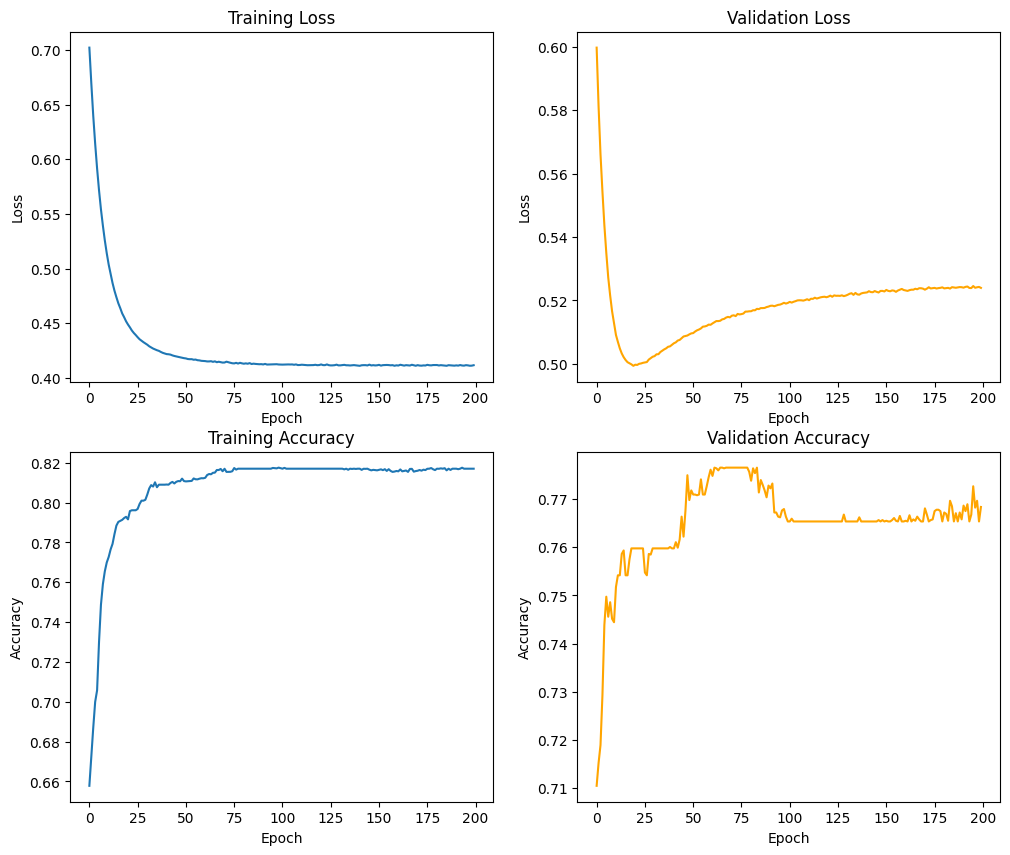

In [9]:
# Initiation
lr = 0.01
epochs = 200
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size = X_train.shape[1])

train_accs = []
train_losses = []
val_accs = []
val_losses = []


# Run logistics regression
for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []
    shuffled_indices = np.random.permutation(X_train.shape[0])
    X_train = X_train[shuffled_indices]
    y_train = y_train[shuffled_indices]
    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+ batch_size]
        y_i = y_train[i:i+ batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    if (epoch + 1) % 5 == 0:
        print(f'\n EPOCH {epoch + 1}: \t Training loss: {train_batch_loss :.3f} \t Validation loss: {val_batch_loss: .3f}')


# Visualization
fig, ax = plt.subplots(2, 2, figsize=(12 , 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel = 'Epoch', ylabel = 'Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set( xlabel = 'Epoch', ylabel = 'Accuracy')
ax[1, 1].set_title('Validation Accuracy')

# Twitter Sentiment Analysis

In [10]:
!gdown --id 1u_lWZPAVIdWG2gsi5myYhdtMoJ3MP0_j
!unzip /content/twitter_sentiment_analysis_2cls_dataset.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1u_lWZPAVIdWG2gsi5myYhdtMoJ3MP0_j
To: /content/twitter_sentiment_analysis_2cls_dataset.zip
100% 471k/471k [00:00<00:00, 32.8MB/s]
Archive:  /content/twitter_sentiment_analysis_2cls_dataset.zip
  inflating: sentiment_analysis.csv  


In [11]:
import pandas as pd
import numpy as np

from collections import defaultdict

import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer

In [12]:
# Read data
dataset_path = '/content/sentiment_analysis.csv'
df = pd.read_csv(dataset_path, index_col ='id')
df

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...
...,...,...
7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7917,0,We would like to wish you an amazing day! Make...
7918,0,Helping my lovely 90 year old neighbor with he...


In [13]:
# Standardize text data

def text_normalize(text):
    # Retweet old acronym "RT" removal
    text = re.sub(r'^RT[\s]+', '', text)

    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    # Hashtags removal
    text = re.sub(r'#', '', text)

    # Punctuation removal
    text = re.sub(r'[^\ w\s]', '', text)

    # Tokenization
    tokenizer = TweetTokenizer(
        preserve_case = False,
        strip_handles = True,
        reduce_len = True
    )
    text_tokens = tokenizer.tokenize(text)

    return text_tokens

In [14]:
# Store frequency for each word

def get_freqs(df):
    freqs = defaultdict(lambda : 0)
    for idx, row in df.iterrows():
        tweet = row['tweet']
        label = row['label']

        tokens = text_normalize(tweet)
        for token in tokens:
            pair = (token, label)
            freqs [pair] += 1

    return freqs

In [15]:
# Build features vector

def get_feature(text, freqs):
    tokens = text_normalize(text)

    X = np.zeros(3)
    X[0] = 1

    for token in tokens:
        X[1] += freqs[(token, 0)]
        X[2] += freqs[(token, 1)]

    return X

In [16]:
# Extract features for entire data

X = []
y = []

freqs = get_freqs(df)
for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']

    X_i = get_feature(tweet, freqs)

    X.append(X_i)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [17]:
# Split data to train, val and test
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size = val_size,
    random_state = random_state,
    shuffle = is_shuffle
)

X_train , X_test , y_train , y_test = train_test_split(
    X_train , y_train ,
    test_size = test_size ,
    random_state = random_state ,
    shuffle = is_shuffle
)

In [18]:
# Standardize data
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])


 EPOCH 5: 	 Training loss: 0.569 	 Validation loss:  0.573

 EPOCH 10: 	 Training loss: 0.568 	 Validation loss:  0.573

 EPOCH 15: 	 Training loss: 0.568 	 Validation loss:  0.573

 EPOCH 20: 	 Training loss: 0.568 	 Validation loss:  0.573

 EPOCH 25: 	 Training loss: 0.568 	 Validation loss:  0.573

 EPOCH 30: 	 Training loss: 0.569 	 Validation loss:  0.573

 EPOCH 35: 	 Training loss: 0.568 	 Validation loss:  0.573

 EPOCH 40: 	 Training loss: 0.568 	 Validation loss:  0.573

 EPOCH 45: 	 Training loss: 0.568 	 Validation loss:  0.573

 EPOCH 50: 	 Training loss: 0.568 	 Validation loss:  0.573


Text(0.5, 1.0, 'Validation Accuracy')

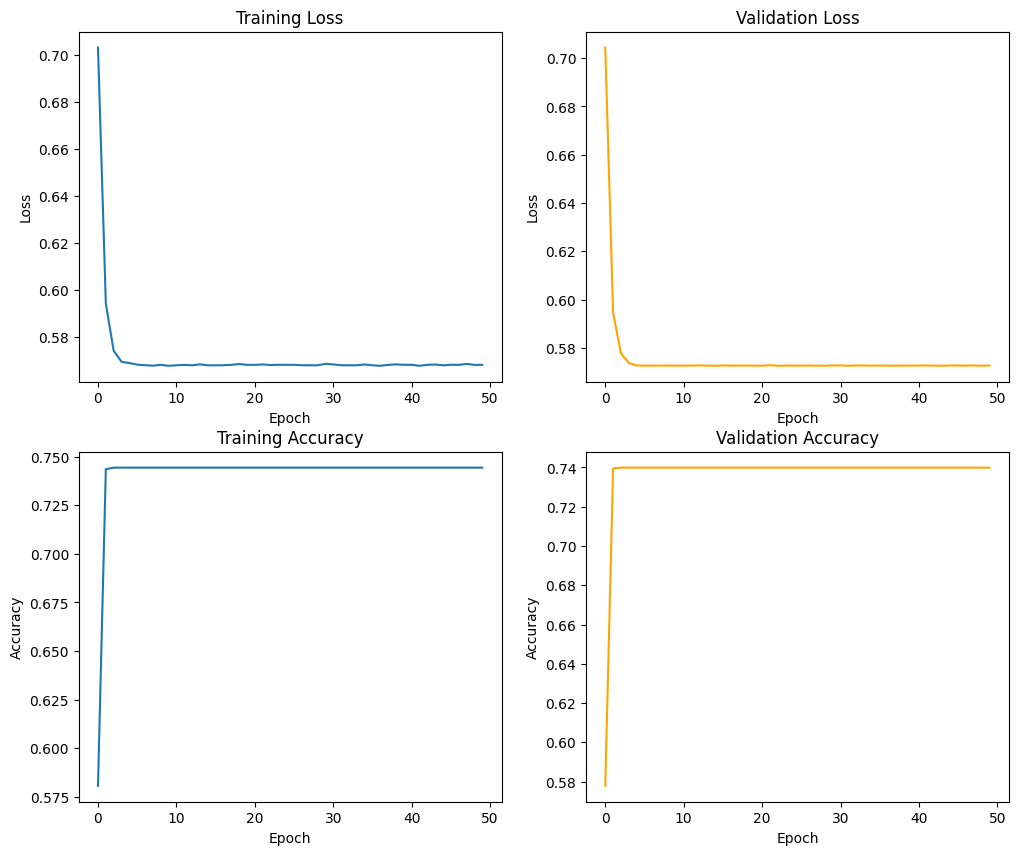

In [19]:
# Initiation
lr = 0.01
epochs = 50
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size = X_train.shape[1])

train_accs = []
train_losses = []
val_accs = []
val_losses = []


# Run logistics regression
for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []
    shuffled_indices = np.random.permutation(X_train.shape[0])
    X_train = X_train[shuffled_indices]
    y_train = y_train[shuffled_indices]
    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+ batch_size]
        y_i = y_train[i:i+ batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    if (epoch + 1) % 5 == 0:
        print(f'\n EPOCH {epoch + 1}: \t Training loss: {train_batch_loss :.3f} \t Validation loss: {val_batch_loss: .3f}')


# Visualization
fig, ax = plt.subplots(2, 2, figsize=(12 , 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel = 'Epoch', ylabel = 'Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set( xlabel = 'Epoch', ylabel = 'Accuracy')
ax[1, 1].set_title('Validation Accuracy')

In [20]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Accuracy: 0.73989898989899
Accuracy: 0.7512626262626263


# Exercise

In [21]:
def predict(X, theta):
    z = np.dot(X, theta )
    return 1 / (1 + np.exp(-z))

X = [[22.3, -1.5, 1.1, 1]]
theta = [0.1, -0.15, 0.3, -0.2]

print(predict(X, theta))

[0.92988994]


In [23]:
def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

y = np.array([1, 0, 0, 1])
y_hat = np.array([0.8, 0.75, 0.3, 0.95])

print(compute_loss(y_hat, y))

0.5043515376900958


In [25]:
def compute_gradient(X, y_true, y_pred):
    gradient = np.dot(X.T, (y_pred - y_true)) / y_true.size
    return gradient

X = np.array([[1, 2], [2, 1], [1, 1], [2, 2]])
y_true = np.array([0, 1, 0, 1])
y_pred = np.array([0.25, 0.75, 0.4, 0.8])

print(compute_gradient(X, y_true, y_pred))

[-0.0625  0.0625]


In [27]:
def compute_accuracy(y_true, y_pred):
    y_pred_rounded = np.round(y_pred)
    accuracy = np.mean(y_true == y_pred_rounded)
    return accuracy

y_true = np.array([1, 0, 1, 1])
y_pred = np.array([0.85, 0.35, 0.9, 0.75])

print(compute_accuracy(y_true, y_pred))

1.0


In [28]:
def compute_gradient(X, y_true, y_pred):
    gradient = np.dot(X.T, (y_pred - y_true)) / y_true.size
    return gradient

X = np.array([[1, 3], [2, 1], [3, 2], [1, 2]])
y_true = np.array([1, 0, 1, 1])
y_pred = np.array([0.7, 0.4, 0.6, 0.85])

print(compute_gradient(X, y_true, y_pred))

[-0.2125 -0.4   ]
